# Homework 1 CPSC 8430
## Andrew Wright

## 1-1: Simulate a function

Function I am using is:

$$
f(x) = 5\sin^2(\frac{x}{2})
$$

## Function #1

Mean squared error: 0.005840739700943232


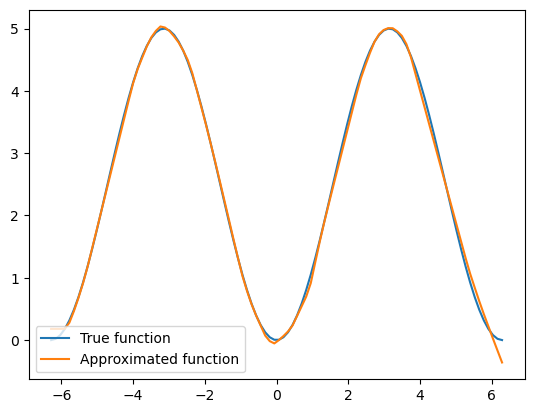

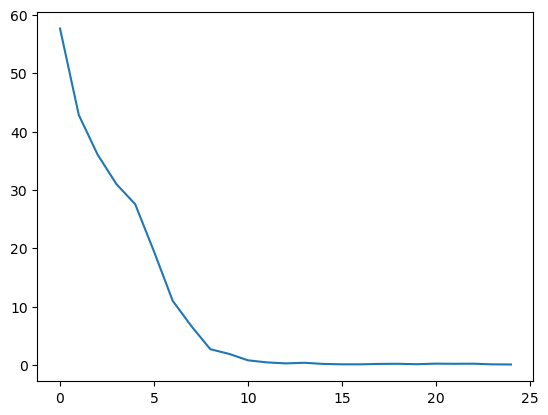

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to approximate
def fn(x):
    return 5*torch.sin(0.5*x)**2

# Create the neural network model
class model_class_1(nn.Module):
    def __init__(self, D_i, D_k, D_o):
        super(model_class_1, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(D_i, D_k),  # Input layer
            nn.ReLU(),
            nn.Linear(D_k, D_k),  # Hidden layer
            nn.ReLU(),
            nn.Linear(D_k, D_o)     # Output layer
        )

    def forward(self, x):
        return self.layers(x)

# Create model, optimizer, and loss function
model = model_class_1(D_i = 1, D_k = 100, D_o = 1)
optimizer = optim.Adam(model.parameters(), lr = 0.01)
loss_fn = nn.MSELoss()

# Generate training data
x_train = torch.linspace(-2 * torch.pi, 2 * torch.pi, 200).unsqueeze(1)
y_train = fn(x_train)
data_loader = DataLoader(TensorDataset(x_train,y_train), batch_size=20, shuffle=True)

# Training loop
loss_vec = []
for epoch in range(25):
    epoch_loss = 0.0
    for i,data in enumerate(data_loader):
        x_batch, y_batch = data
        optimizer.zero_grad()
    #print(x_train.shape)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    loss_vec.append(epoch_loss)
# Evaluate the model
x_test = torch.linspace(-2 * torch.pi, 2 * torch.pi, 100).unsqueeze(1)
y_test = fn(x_test)
y_pred = model(x_test)

print("Mean squared error:", loss_fn(y_pred, y_test).item())

# Visualize the results (optional)
plt.plot(x_test.detach(), y_test.detach(), label="True function")
plt.plot(x_test.detach(), y_pred.detach(), label="Approximated function")
plt.legend()
plt.show()
plt.plot(np.arange(0,len(loss_vec),1),np.array(loss_vec))


## Function #2

Mean squared error: 0.0032741075847297907


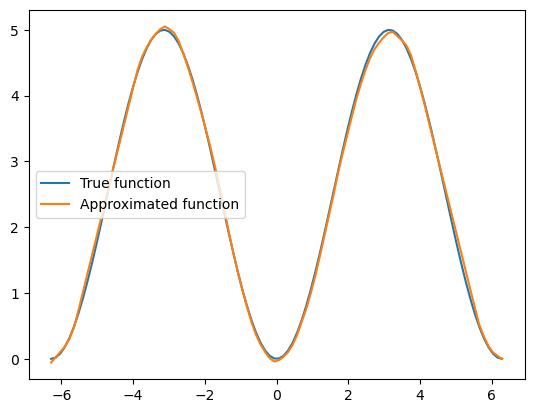

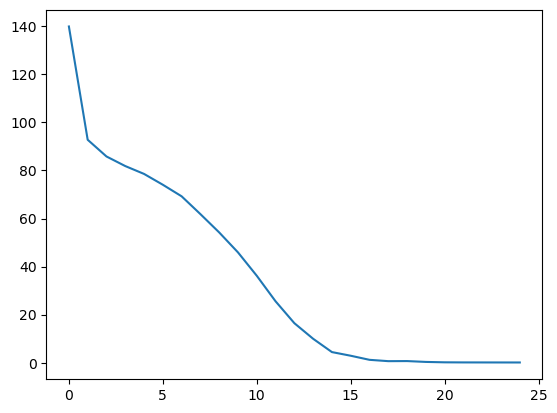

In [19]:
# Define the function to approximate
def fn(x):
    return 5*torch.sin(0.5*x)**2

# Create the neural network model
class model_class_2(nn.Module):
    def __init__(self, D_i, D_k1, D_k2, D_k3, D_o):
        super(model_class_2, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(D_i, D_k1),  # Input layer
            nn.ReLU(),
            nn.Linear(D_k1, D_k2),  # Hidden layer 1
            nn.ReLU(),
            nn.Linear(D_k2, D_k3),  # Hidden layer 2
            nn.ReLU(),
            nn.Linear(D_k3, D_o)     # Output layer
        )

    def forward(self, x):
        return self.layers(x)

# Create model, optimizer, and loss function
model = model_class_2(D_i = 1, D_k1 = 128, D_k2 = 64, D_k3 = 32, D_o = 1)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.MSELoss()

# Generate training data
x_train = torch.linspace(-2 * torch.pi, 2 * torch.pi, 200).unsqueeze(1)
y_train = fn(x_train)
data_loader = DataLoader(TensorDataset(x_train,y_train), batch_size=10, shuffle=True)

# Training loop
loss_vec = []
for epoch in range(25):
    epoch_loss = 0.0
    for i,data in enumerate(data_loader):
        x_batch, y_batch = data
        optimizer.zero_grad()
    #print(x_train.shape)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    loss_vec.append(epoch_loss)
# Evaluate the model
x_test = torch.linspace(-2 * torch.pi, 2 * torch.pi, 100).unsqueeze(1)
y_test = fn(x_test)
y_pred = model(x_test)

print("Mean squared error:", loss_fn(y_pred, y_test).item())

# Visualize the results (optional)
plt.plot(x_test.detach(), y_test.detach(), label="True function")
plt.plot(x_test.detach(), y_pred.detach(), label="Approximated function")
plt.legend()
plt.show()
plt.plot(np.arange(0,len(loss_vec),1),np.array(loss_vec))